# House price prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv("train_assg3.csv")
test_data = pd.read_csv("test.csv")
test_target = pd.read_csv("sample_submission.csv")
test_linear = test_data['LotArea']
test_linear = test_linear.to_numpy()
test_target = test_target.to_numpy()

In [3]:
test_target = test_target[:, -1]
test_target

array([169277.0524984 , 187758.39398877, 183583.68356955, ...,
       219222.42340006, 184924.279659  , 187741.86665748])

In [4]:
feature_linear = data["LotArea"]

In [5]:
target = data["SalePrice"]

## Linear Regression using Mathematical function

In [6]:
numerator = ((feature_linear - feature_linear.mean())*(target-target.mean())).sum()
numerator

305238951037.16846

In [7]:
denominator = ((feature_linear-feature_linear.mean())*(feature_linear-feature_linear.mean())).sum()
denominator

145353822839.84863

In [8]:
weight = numerator / denominator
weight

2.0999719517076745

In [9]:
bias = target.mean() - weight*feature_linear.mean()
bias

158836.1518968766

In [10]:
predictions = (weight*feature_linear)+bias
predictions

0       176580.914889
1       178995.882633
2       182460.836354
3       178890.884036
4       188781.751928
            ...      
1455    175461.629839
1456    186503.282361
1457    177824.098284
1458    179241.579352
1459    179703.573181
Name: LotArea, Length: 1460, dtype: float64

In [11]:
mean_abs_error = abs(target - predictions)
mean_abs_error.sum()

80477697.44150563

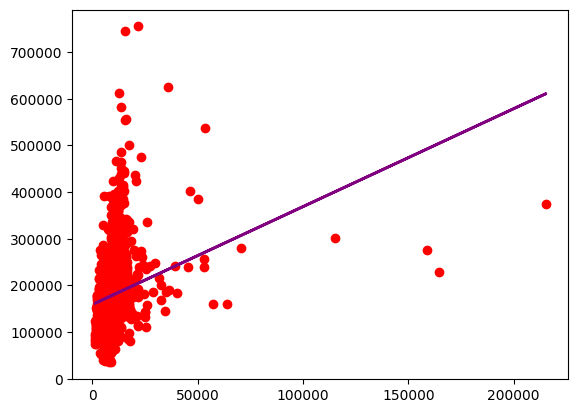

In [12]:
plt.scatter(feature_linear, target, color = "red")
plt.plot(feature_linear,predictions, color = "purple",  linewidth = 2  )

In [13]:
predictions = (weight*test_linear)+bias
mean_abs_error = abs(test_target - predictions)
mean_abs_error.sum()

12402512.721768772

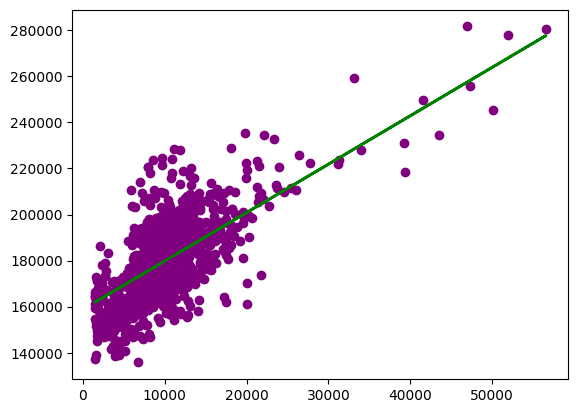

In [14]:
plt.scatter(test_linear, test_target, color = "purple")
plt.plot(test_linear,predictions, color = "green" ,  linewidth = 2 )

#### By studying above graph we can see some outliers in LotArea > 50000 by removing them we can increase the accuracy

In [15]:
deleterows = feature_linear[(feature_linear>50000)].index

feature_linear.drop(deleterows, inplace = True)
target.drop(deleterows, inplace = True)

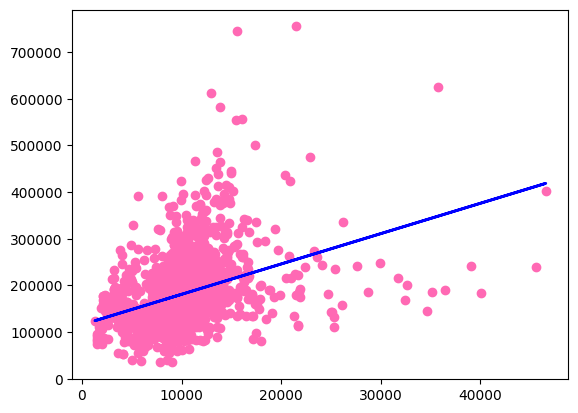

In [16]:
numerator = ((feature_linear - feature_linear.mean())*(target-target.mean())).sum()
denominator = ((feature_linear-feature_linear.mean())*(feature_linear-feature_linear.mean())).sum()
weight = numerator / denominator
bias = target.mean() - weight*feature_linear.mean()
predictions = (weight*feature_linear)+bias

plt.scatter(feature_linear, target, color = "hotpink")
plt.plot(feature_linear,predictions, color = "blue", linewidth = 2 )

In [17]:
mean_abs_error = abs(target - predictions)
mean_abs_error.sum()

76830126.79914275

### ACCURACY IMPROVED!

#### Removing more outliers

In [18]:
deleterows = feature_linear[(feature_linear>20000)].index

feature_linear.drop(deleterows, inplace = True)
target.drop(deleterows, inplace = True)

In [19]:
deleterows = target[(target>500000)].index

feature_linear.drop(deleterows, inplace = True)
target.drop(deleterows, inplace = True)

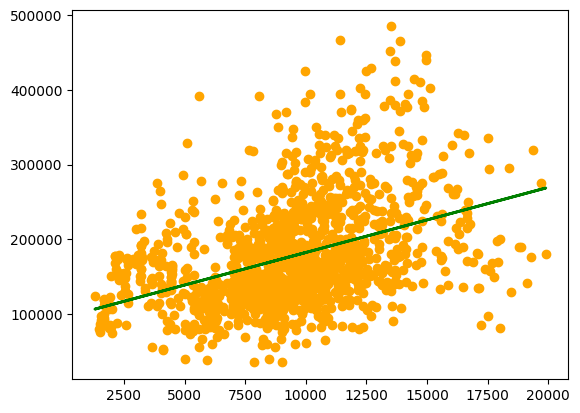

In [20]:
numerator = ((feature_linear - feature_linear.mean())*(target-target.mean())).sum()
denominator = ((feature_linear-feature_linear.mean())*(feature_linear-feature_linear.mean())).sum()
weight = numerator / denominator
bias = target.mean() - weight*feature_linear.mean()
predictions = (weight*feature_linear)+bias

plt.scatter(feature_linear, target, color = "orange")
plt.plot(feature_linear,predictions, color = "green" ,  linewidth = 2 )

In [21]:
mean_abs_error = abs(target - predictions)
mean_abs_error.sum()

69557989.34010467

### IMPROVED ACCURACY AGAIN

In [22]:
print(weight, bias)

8.722986789888187 95014.53384643844


### Test

In [23]:
predictions = (weight*test_linear)+bias
mean_abs_error = abs(test_target - predictions)
mean_abs_error.sum()

30959481.602872938

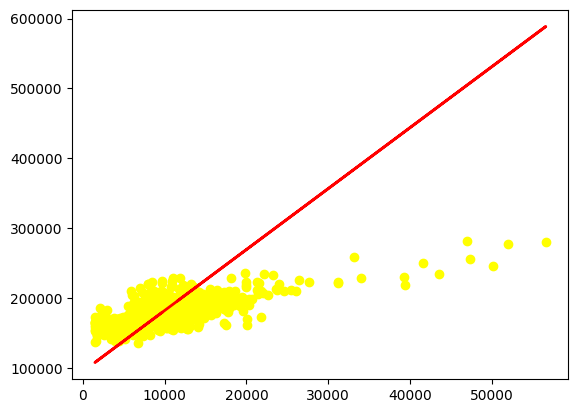

In [24]:
plt.scatter(test_linear, test_target, color = "yellow")
plt.plot(test_linear,predictions, color = "red" ,  linewidth = 2 )

## Linear RegRession using Gradient descent

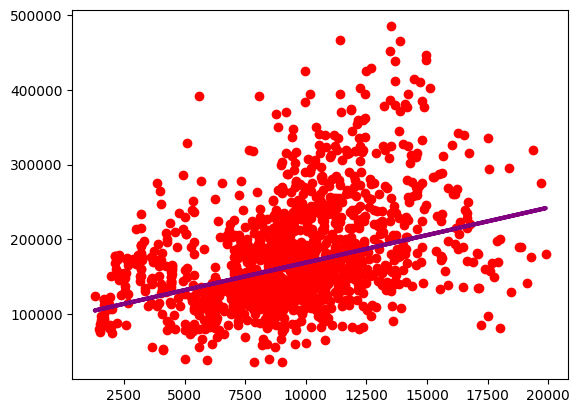

In [25]:
weight_grad = 7.366898
bias_grad = 88972.96466789

epochs = 100
alpha = 0.0000000000001


prediction = (weight_grad*feature_linear)+bias

for ep in range(0, epochs):

    d_w = (((prediction - target)*feature_linear).sum())/(1401)
    temp_w = weight_grad - alpha*d_w
    d_b = (((prediction - target)).sum())/(1401)
    temp_b = bias_grad - alpha*d_b

    weight_grad = temp_w
    bias_grad = temp_b

    prediction = (weight_grad*feature_linear)+bias


plt.scatter(feature_linear, target, color = "red")
plt.plot(feature_linear,prediction, color = "purple" ,  linewidth = 3 )

In [26]:
mean_abs_error = abs(target - prediction)
mean_abs_error.sum()

67695065.99543107

In [27]:
weight_grad, bias_grad

(7.368226288299625, 88972.9646680166)

In [28]:
predictions = (weight_grad*test_linear)+bias_grad
mean_abs_error = abs(test_target - predictions)
mean_abs_error.sum()

37574068.94414124

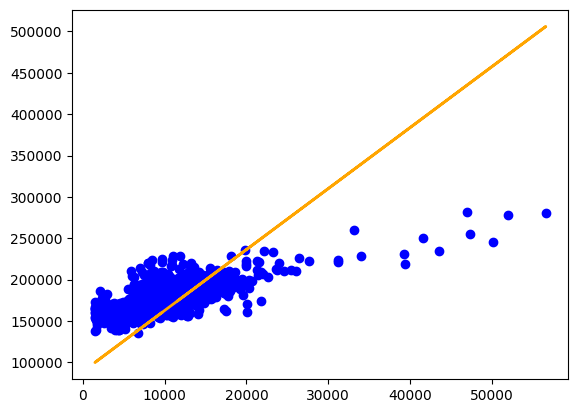

In [29]:
plt.scatter(test_linear, test_target, color = "blue")
plt.plot(test_linear,predictions, color = "orange" ,  linewidth = 2 )

### using sklearn linear reg

In [30]:
feature_linear_2 = feature_linear.to_numpy()
feature_linear_2 = feature_linear_2.reshape(-1,1)
target_2 = target.to_numpy()
target_2 = target_2.reshape(-1,1)
reg = LinearRegression().fit(feature_linear_2, target_2)
reg.coef_,reg.intercept_

(array([[8.72298679]]), array([95014.53384644]))

### IMPROVED ACCURACY


## Multi linear Regression using mathematical function

In [31]:
num_cols = data.columns[(data.dtypes != "object").tolist()].tolist()

In [32]:
data2 = data.copy()
data2 = data2[num_cols]

In [33]:
data2.dropna(axis=0, inplace = True)
data3 = data2.copy()

In [34]:
target = data2["SalePrice"]
data2.drop(['SalePrice','Id'], axis=1, inplace = True)
num_cols.remove('Id')
num_cols.remove('SalePrice')
numcol2 = num_cols
target.shape

(1121,)

In [35]:
weights = np.array([], dtype='int64')
biases = np.array([], dtype='int64')

for i in data2:
    if i in num_cols:
        numerator = ((data2[i] - data2[i].mean())*(target-target.mean())).sum()
        denominator = ((data2[i]-data2[i].mean())**2).sum()
        weights = np.append(weights, numerator/denominator)
        biases = np.append(biases,target.mean() - (numerator/denominator)*data[i].mean())

features = data2[num_cols].to_numpy()
weights = weights.reshape(1,-1)
biases = biases.reshape(1,-1)

predictions = features*weights
# predictions

pred = []
for i in predictions:
    pred.append((i+biases).sum())

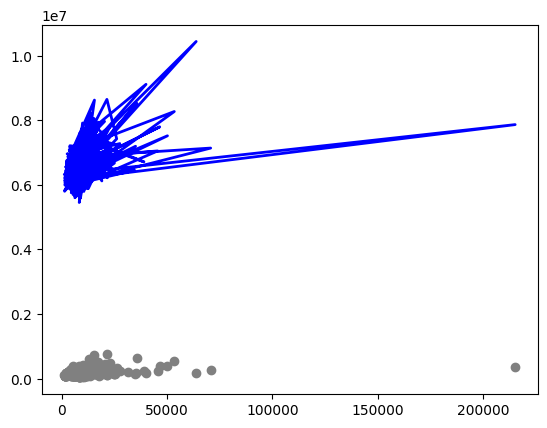

In [36]:
plt.scatter(data2['LotArea'], target, color = "grey")
plt.plot(data2['LotArea'],pred, color = "blue" ,  linewidth = 2 )

In [37]:
mean_abs_error = abs(target - pred)
mean_abs_error.sum()

7317691227.510419

## Multiple linear regression using Gradient descent

In [38]:
target_grad = data3['SalePrice']


In [39]:
deleterows = data3[(data3['LotArea']>20000)].index
deleterows

data3.drop(deleterows, inplace = True)
target_grad.drop(deleterows, inplace = True)

In [40]:
deleterows = target_grad[(target_grad>500000)].index

data3.drop(deleterows, inplace = True)
target_grad.drop(deleterows, inplace = True)

In [41]:
feature_grad = data3[numcol2]
data3.drop(['SalePrice','Id'], axis=1, inplace = True)
target_grad.shape, feature_grad.shape

((1082,), (1082, 36))

In [42]:
target_grad.shape, feature_grad.shape

((1082,), (1082, 36))

In [43]:
for col in feature_grad.columns:
    feature_grad[col] = (feature_grad[col] - feature_grad[col].mean())/feature_grad[col].std()

In [44]:
target_grad = (target_grad - target_grad.mean())/target_grad.std()

In [45]:
target_grad = target_grad.to_numpy()
target_grad = target_grad.reshape(1,-1)
target_grad
features = feature_grad['LotArea']
features = features.to_numpy().reshape(-1,1)
feature_grad = feature_grad.to_numpy()

In [46]:
feature_grad.shape, target_grad.shape, data3.shape

((1082, 36), (1, 1082), (1082, 36))

In [47]:
weights.shape, biases.shape

((1, 36), (1, 36))

increase epochs 

In [49]:
weights_grad = np.random.rand(1,36)
biases_grad = np.random.rand(1,36)

epochs = 100000
alpha = 0.0000001

predictions = feature_grad*weights_grad

pred_grad = []
for i in predictions:
    pred_grad.append((i+biases_grad).sum())

prediction = np.array(pred_grad)

x = np.setdiff1d(prediction , target_grad)

epc = []
err = []
epc.append(0)
err.append(mean_absolute_error(target_grad[0], prediction))

for ep in range(0, epochs):
    temp_w = np.array([], dtype='int64')
    temp_b = np.array([], dtype='int64')
    j =0
    x = np.setdiff1d(prediction , target_grad)
    epc.append(ep+1)

    for i in data3:
        d_w = ((x*feature_grad[:, j]).sum())/(1121)
        temp_w = np.append(temp_w, weights_grad[0][j] - alpha*d_w)
        d_b = (x.sum())/(1121)
        temp_b = np.append(temp_b,biases_grad[0][j] - alpha*d_b)
        j= j+1

    weights_grad[0] = temp_w
    biases_grad[0] = temp_b

    predictions = feature_grad*weights_grad
    pred = []
    for i in predictions:
        pred.append((i+biases_grad).sum())

    prediction = np.array(pred)
    prediction = prediction.reshape(1,-1)
    err.append(mean_absolute_error(target_grad, prediction))
    
    if ep % 2000 ==0:
        print("err at", ep, " = ", mean_absolute_error(target_grad, prediction))
        alpha = 1.1 * alpha

print("err at", ep, " = ", mean_absolute_error(target_grad, prediction))
prediction = prediction.reshape(-1)


err at 0  =  18.581615855317253
err at 2000  =  18.440110714427842
err at 4000  =  18.28569935125151
err at 6000  =  18.117339801741952
err at 8000  =  17.933934087356025
err at 10000  =  17.734331462709676
err at 12000  =  17.51733345609918
err at 14000  =  17.281701074463076
err at 16000  =  17.02633241798093
err at 18000  =  16.75011765619213
err at 20000  =  16.451463713844028
err at 22000  =  16.129102639006984
err at 24000  =  15.781810275147947
err at 26000  =  15.408436314646787
err at 28000  =  15.007939911443017
err at 30000  =  14.579431220386628
err at 32000  =  14.12221907275232
err at 34000  =  13.63616021427782
err at 36000  =  13.121495806409175
err at 38000  =  12.577866531543917
err at 40000  =  12.007347949776106
err at 42000  =  11.413646881327734
err at 44000  =  10.799292636691078
err at 46000  =  10.164849866629815
err at 48000  =  9.521723461988465
err at 50000  =  8.87965329427518
err at 52000  =  8.24492667589355
err at 54000  =  7.629964719449356
err at 56000

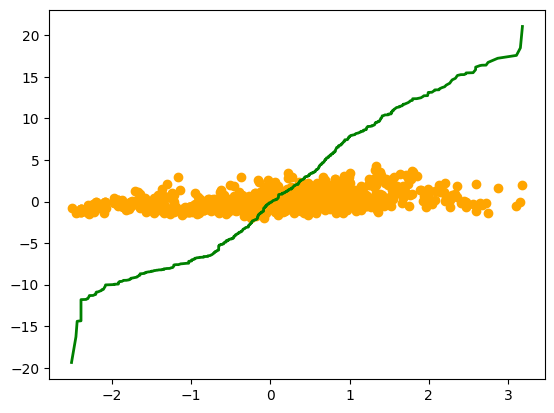

In [50]:
features_sorted = np.sort(features, axis = None).reshape(-1,1)
target_grad_sorted = np.sort(target_grad, axis = None).reshape(-1,1)
prediction = np.sort(prediction, axis = None).reshape(-1,1)

plt.scatter(features, target_grad, color = "orange")
plt.plot(features_sorted,prediction, color = "green" ,  linewidth = 2 )

In [58]:
prediction.shape

(1082, 1)

In [59]:
features_sorted

array([[-2.51217077],
       [-2.45641579],
       [-2.4409808 ],
       ...,
       [ 3.10679742],
       [ 3.1565674 ],
       [ 3.1823974 ]])

In [ ]:
# predictions = features_sorted*weights_grad

# pred_grad = []
# for i in predictions:
#     pred_grad.append((i+biases_grad).sum())

# prediction = np.array(pred_grad)

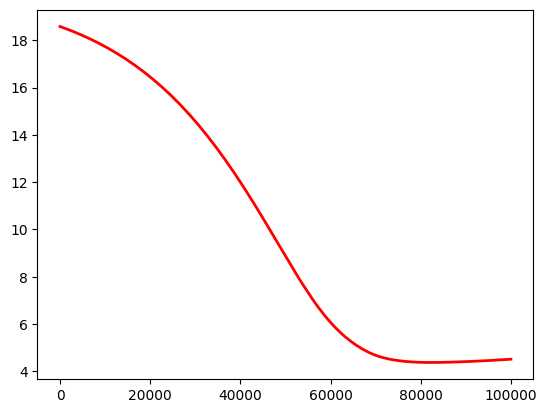

In [51]:
plt.plot(epc,err, color = "red" ,  linewidth = 2 )

In [52]:
mean_abs_error = abs(target_grad - prediction)
mean_abs_error.sum()

6140015.30360724

In [53]:
mean_absolute_error(target_grad[0], prediction)

5.29743619350587

In [54]:
target_grad_sk = target_grad.reshape(-1,1)
multi_reg = LinearRegression().fit(feature_grad, target_grad_sk)

In [55]:
pred_multi = multi_reg.predict(feature_grad)
pred_multi = np.sort(pred_multi, axis = None).reshape(-1,1)

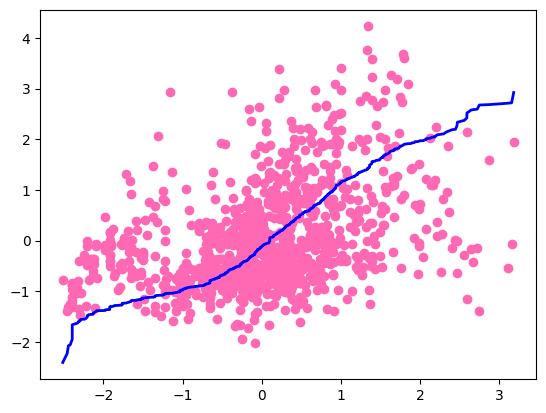

In [56]:
plt.scatter(features, target_grad, color = "hotpink")
plt.plot(features_sorted,pred_multi, color = "blue" ,  linewidth = 2 )

In [57]:
mean_absolute_error(target_grad_sk, pred_multi)

1.089182423320096